<a href="https://colab.research.google.com/github/Kajikage/Datascience/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt

day_copy = pd.read_csv("day_copy.csv")
day_copy.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
df = day_copy.drop(['dteday','yr','casual','registered'], axis = 1)
day_copy.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Dropped Attributes that i think we don't need


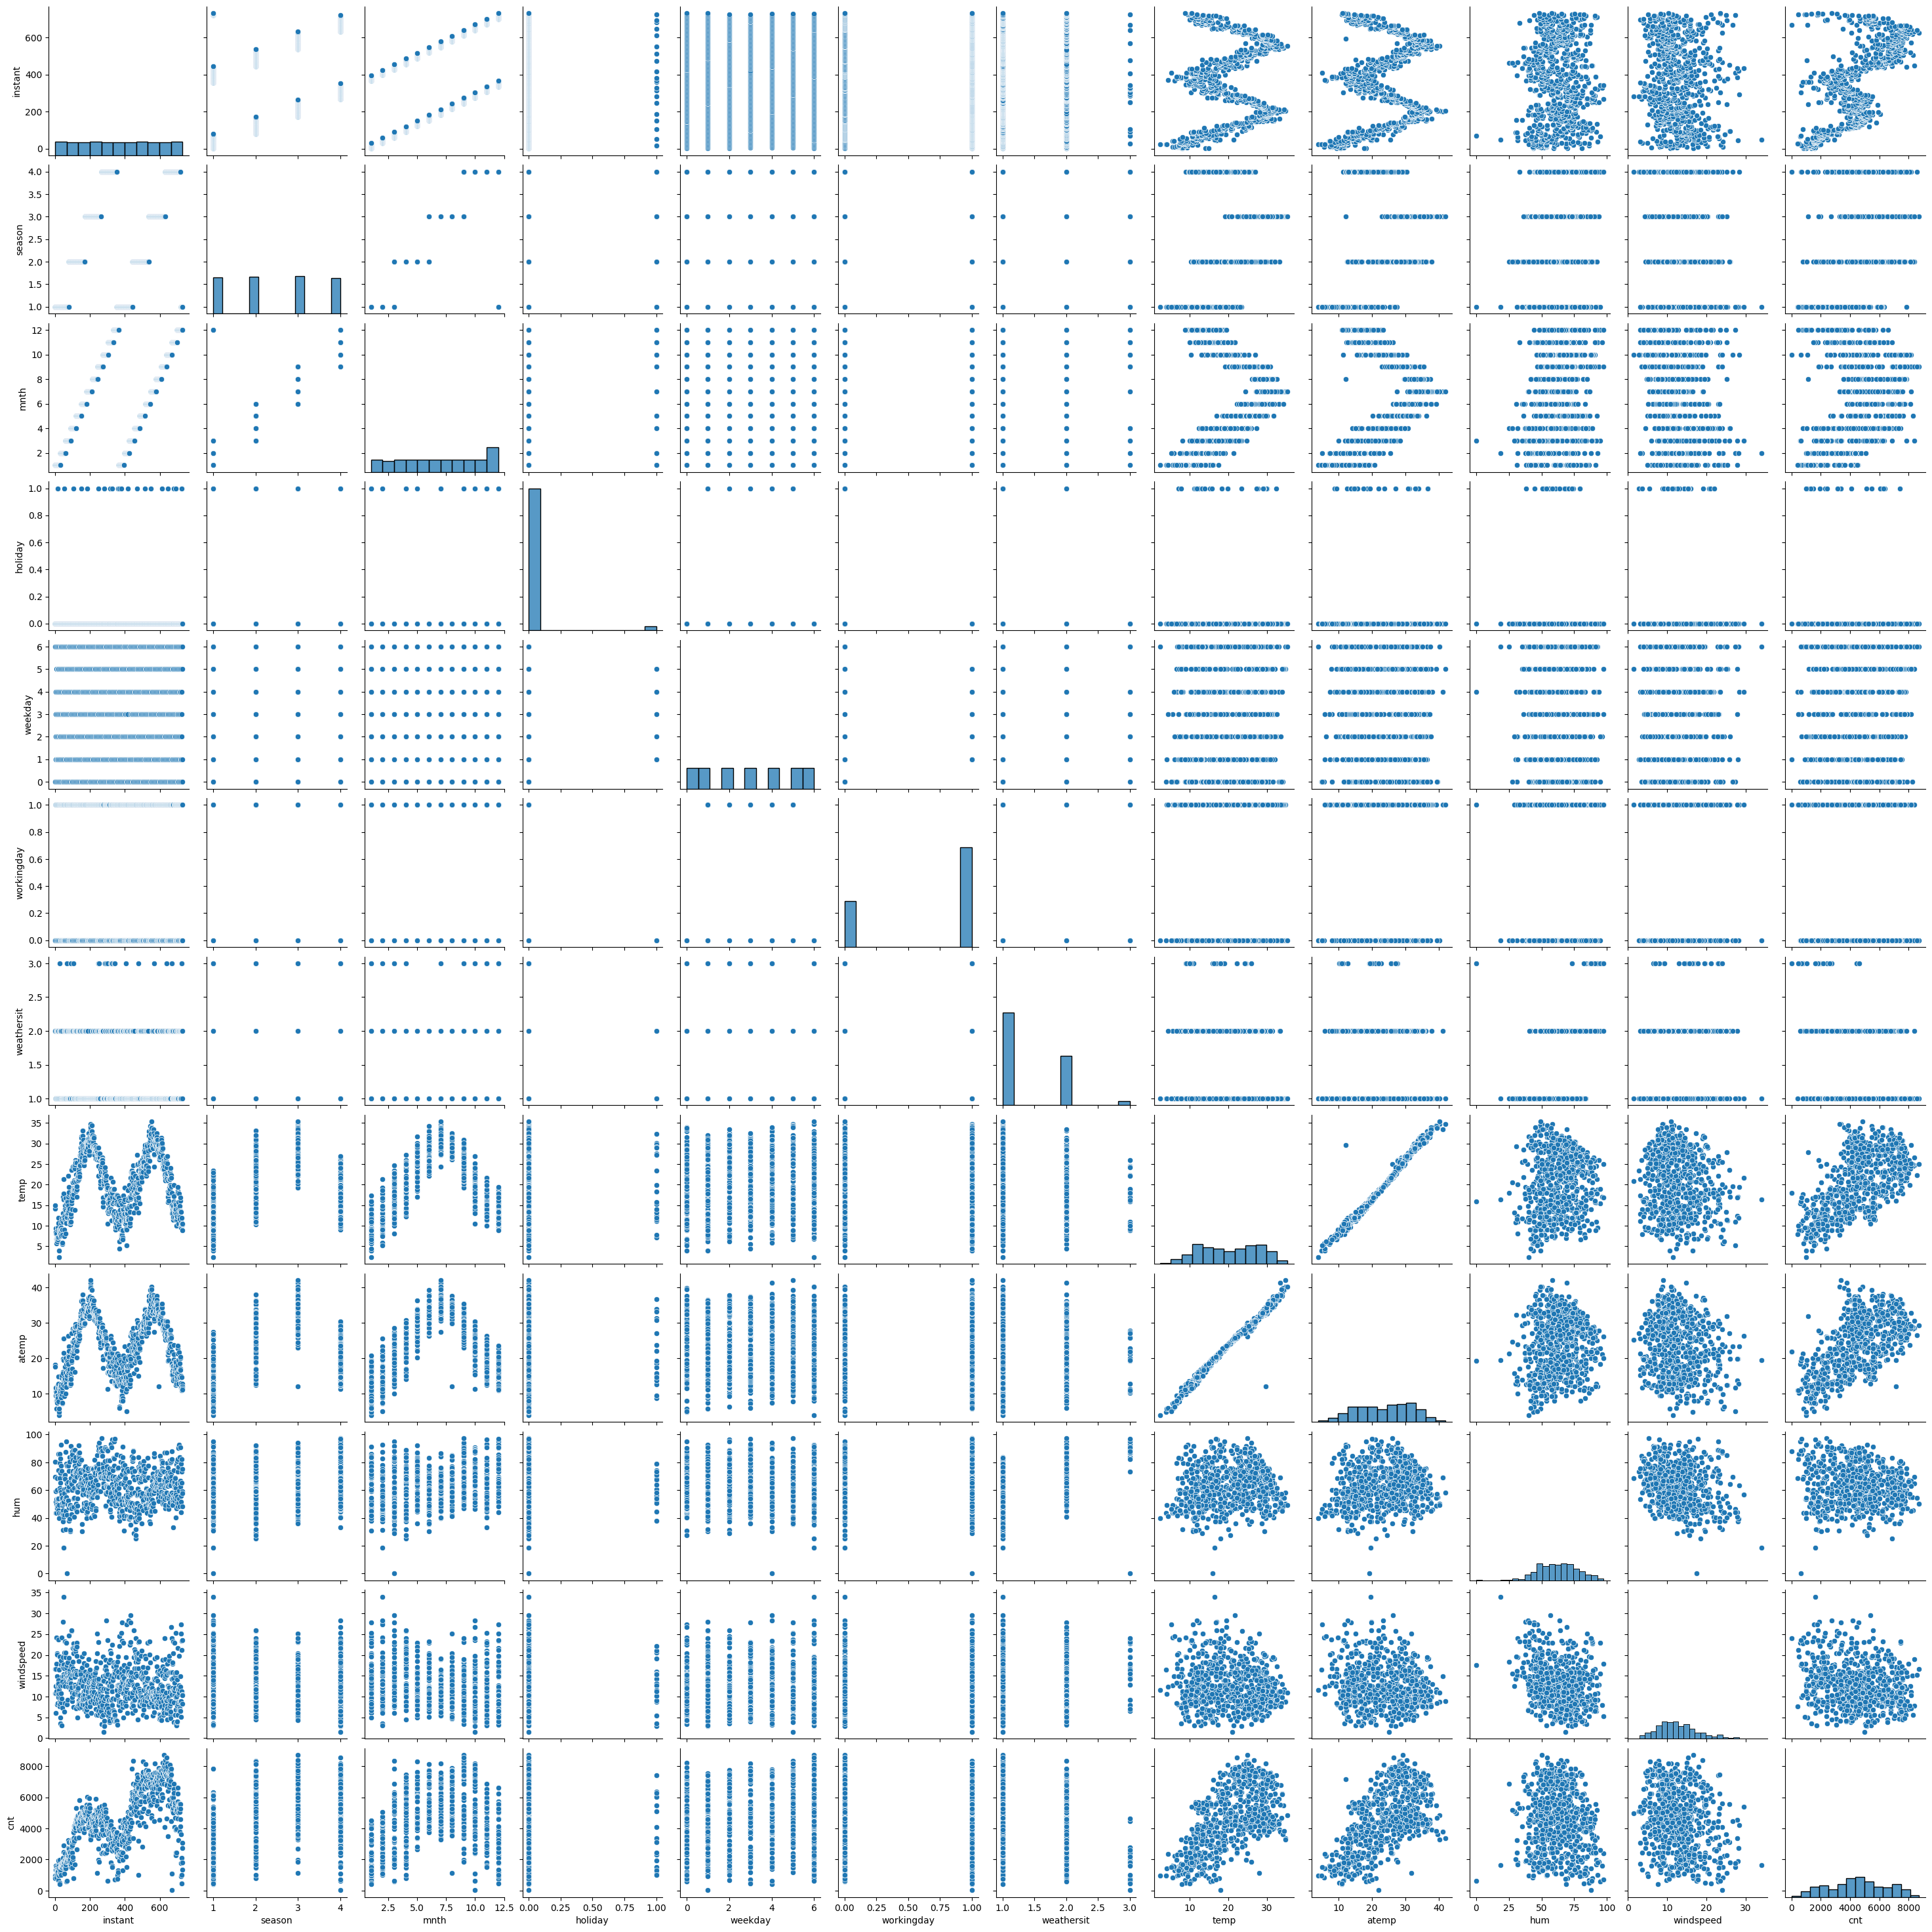

In [36]:
sns.pairplot(df)
plt.show()

#using matplotlib.pyplot to plot the attributes.

In [37]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [38]:
def monthday(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

df['month'] = df['mnth'].apply(monthday)
df = df.drop('mnth' , axis = 1 )
df.head()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month
0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Jan
1,2,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Jan
2,3,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan
3,4,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Jan
4,5,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Jan


In [39]:
def day_name(x):
    if x == 1:
        return 'Sun'
    elif x == 2:
        return 'Mon'
    elif x == 3:
        return 'Tue'
    elif x == 4:
        return 'Wed'
    elif x == 5:
        return 'Thu'
    elif x == 6:
        return 'Fri'
    elif x == 7:
        return 'Sat'

df['wkd'] = df['weekday'].apply(day_name)
df = df.drop('weekday' , axis = 1 )
df.head()

,instant,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,wkd
0,1,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985,Jan,Fri
1,2,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Jan,None
2,3,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,Sun
3,4,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,Mon
4,5,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,Tue


In [40]:
def h_name(x):
  if x== 1:
    return "Holiday"
  elif x == 0:
    return "No Holiday"

df['Holiday'] = df['holiday'].apply(h_name)
df = df.drop('holiday' , axis = 1 )
df.head()



,instant,season,workingday,weathersit,temp,atemp,hum,windspeed,cnt,month,wkd,Holiday
0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,985,Jan,Fri,No Holiday
1,2,1,0,2,14.902598,17.68695,69.6087,16.652113,801,Jan,None,No Holiday
2,3,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,Sun,No Holiday
3,4,1,1,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,Mon,No Holiday
4,5,1,1,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,Tue,No Holiday


In [41]:
wkd_dummy = pd.get_dummies(df.wkd, drop_first = True)
wkd_dummy.head()

,Mon,Sun,Thu,Tue,Wed
0,0,0,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [42]:
month_dummy = pd.get_dummies(df.month, drop_first = True)
month_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [43]:
wkd_dummy = pd.get_dummies(df.wkd, drop_first = True)
wkd_dummy.head()

,Mon,Sun,Thu,Tue,Wed
0,0,0,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [44]:
Holiday_dummy = pd.get_dummies(df.Holiday, drop_first = True)
Holiday_dummy.head()

,No Holiday
0,1
1,1
2,1
3,1
4,1


In [45]:
data = pd.concat([Holiday_dummy,wkd_dummy,month_dummy ], axis =1)
data.head(20)

,No Holiday,Mon,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
Data = pd.concat([day_copy,data ], axis =1)
Data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,1,0,0,0,0,0,0,0
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,...,0,0,1,0,0,0,0,0,0,0
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,...,0,0,1,0,0,0,0,0,0,0
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,...,0,0,1,0,0,0,0,0,0,0
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,...,0,0,1,0,0,0,0,0,0,0
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

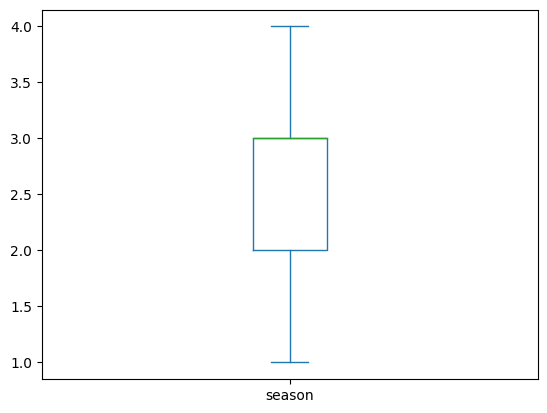

In [47]:
df['season'].plot(kind = 'box')

In [53]:
final = Data.drop(['dteday'], axis = 1)
final.head(20)



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,1,0,1,0,6,0,2,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,2,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,3,1,0,1,0,1,1,1,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,4,1,0,1,0,2,1,1,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,5,1,0,1,0,3,1,1,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0
5,6,1,0,1,0,4,1,1,8.378268,11.66045,...,0,0,1,0,0,0,0,0,0,0
6,7,1,0,1,0,5,1,2,8.057402,10.44195,...,0,0,1,0,0,0,0,0,0,0
7,8,1,0,1,0,6,0,2,6.765000,8.11270,...,0,0,1,0,0,0,0,0,0,0
8,9,1,0,1,0,0,0,1,5.671653,5.80875,...,0,0,1,0,0,0,0,0,0,0
9,10,1,0,1,0,1,1,1,6.184153,7.54440,...,0,0,1,0,0,0,0,0,0,0


In [55]:
final.head

<bound method NDFrame.head of      instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1        0        6           0           2   
1          2       1   0     1        0        0           0           2   
2          3       1   0     1        0        1           1           1   
3          4       1   0     1        0        2           1           1   
4          5       1   0     1        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
725      726       1   1    12        0        4           1           2   
726      727       1   1    12        0        5           1           2   
727      728       1   1    12        0        6           0           2   
728      729       1   1    12        0        0           0           1   
729      730       1   1    12        0        1           1           2   

          temp     atemp  ...  Dec  Feb  Jan  Jul  Jun  M

In [56]:
import sklearn
from sklearn.model_selection import train_test_split

#data division into train and test

In [59]:
final_train, final_test = train_test_split(final, train_size = 0.8, random_state = 100)
print(final_train.shape)
print(final_test.shape)

(584, 32)
(146, 32)


In [68]:
from sklearn.preprocessing import MinMaxScaler


In [69]:
scalar = MinMaxScaler()

In [73]:
numeric = ['temp','hum','windspeed','atemp']

#fitting the scalar on dataframe

In [74]:
final_train[numeric] = scalar.fit_transform(final_train[numeric])

In [75]:
final_train.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
367,368,1,1,1,0,2,1,1,0.113228,0.061963,...,0,0,1,0,0,0,0,0,0,0
648,649,4,1,10,0,4,1,1,0.468352,0.462175,...,0,0,0,0,0,0,0,0,1,0
44,45,1,0,2,0,1,1,1,0.443431,0.419099,...,0,1,0,0,0,0,0,0,0,0
705,706,4,1,12,0,5,1,2,0.326094,0.318824,...,1,0,0,0,0,0,0,0,0,0
379,380,1,1,1,0,0,0,1,0.133996,0.108365,...,0,0,1,0,0,0,0,0,0,0
